### Solutions for 02-Working_with_ASDF_Files

**Exercise 1:**

- Open the file `jwst.asdf` in the `02_Working_With_ASDF_Files` directory. Look at the `info` method's help and   display the file using some of the arguments to show more contents.
- Search for a few attributes - `wcs`, `data`, (WCS stands for World Coordinate System. In astronomy it represents the transform from pixel coordinates to sky coordinates or some physical system.)
- Retrieve the `wcs` object following the path showed by the `search` method
- Look at the `wcs` object and print `wcs.forward_transform`
- Use matplotlib to display the data array
- Look at the `data` array and modify the value of `data[0, 0]`  to 999.

In [1]:
import asdf

**Read the file and use the `info` method to look at the contents**.

`info` has arguments which control the behavior. Use the defaults to look at the contents of the file.

In [12]:
af = asdf.open("jwst.asdf", mode="rw")

In [13]:
af.info(max_rows=200)

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.12.0
├─history (dict)
│ └─extensions (list)
│   ├─[0] (ExtensionMetadata) ...
│   ├─[1] (ExtensionMetadata) ...
│   ├─[2] (ExtensionMetadata) ...
│   ├─[3] (ExtensionMetadata) ...
│   └─[4] (ExtensionMetadata) ...
├─data (NDArrayType): shape=(333, 151, 4), dtype=float32
└─meta (dict)
  ├─aperture (dict)
  │ └─name (str): NRCB3_FULL
  ├─bunit_data (str): DN/s
  ├─bunit_err (str): DN/s
  ├─cal_step (dict)
  │ ├─assign_wcs (str): COMPLETE
  │ ├─dark_sub (str): COMPLETE
  │ ├─dq_init (str): COMPLETE
  │ ├─gain_scale (str): SKIPPED
  │ ├─group_scale (str): SKIPPED
  │ ├─ipc (str): COMPLETE
  │ ├─jump (str): COMPLETE
  │ ├─linearity (str): COMPLETE
  │ ├─ramp_fit (str): COMPLETE
  │ ├─refpix (str): COMPLETE
  │ ├─saturation (str): COMPLETE
  │ └─superbias (str): COMPLETE
  ├─calibration_software_revision (str): RELE

In [14]:
af.search("wcs")

root (AsdfObject)
└─meta (dict)
  ├─cal_step (dict)
  │ └─assign_wcs (str): COMPLETE
  ├─ref_file (dict)
  │ └─specwcs (dict)
  ├─wcs (WCS)
  └─wcsinfo (dict)
    ├─wcsaxes (int): 2
    └─wcsname (str): world

In [15]:
wcs = af["meta"]["wcs"]

In [16]:
# wcs
# It is an object
# type(wcs)

# The GWCS object transforms pixels into world coordinates
# wcs(20, 12.3)

# It contains a chain of transforms and references cooridnate systems
# wcs.forward_transform[0]

# wcs.forward_transform[0].offset

In [17]:
af.search("data")

root (AsdfObject)
├─data (NDArrayType): shape=(333, 151, 4), dtype=float32
└─meta (dict)
  └─bunit_data (str): DN/s

In [18]:
data = af["data"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


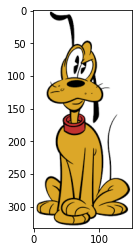

In [24]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.imshow(af["data"])

In [23]:
af["data"][0, 0] = 999

Files are opened in `readonly` mode by default. Pass `mode=rw` to the `open` function to be able to modify them.

**Exercise 2:**

Add `additionalProperties=false` to the schema and open the file

In [ ]:
s = """
%YAML 1.1
---
$schema: http://stsci.edu/schemas/yaml-schema/draft-01

title: Mickey's pet
description: |
  Basic info and a picture of Mickie's 
  dog Pluto.

type: object
properties:
  age:
    title: The age of Pluto
    type: object
    properties:
      birthday:
        title: Pluto's first showing
        tag: tag:stsci.edu:asdf/time/time-1.1.0
  mass:
    title: How much he weighs.
    tag: tag:stsci.edu:asdf/unit/quantity-1.1.0
  picture:
    tag: tag:stsci.edu:asdf/core/ndarray-1.0.0
  name:
    title: Name
    type: string
required: [name, picture]
additionalProperties: false
...
"""

In [ ]:
f = open("add-prop-1.0.0.yaml", mode="w")
f.write(s)
f.close()

In [ ]:
afs = asdf.open("pluto.asdf", custom_schema="./add-prop-1.0.0.yaml")

Take the original schema and add a new required property, called `friend`.

In [ ]:
s = """
%YAML 1.1
---
$schema: http://stsci.edu/schemas/yaml-schema/draft-01

title: Mickey's pet
description: |
  Basic info and a picture of Mickie's 
  dog Pluto.

type: object
properties:
  age:
    title: The age of Pluto
    type: object
    properties:
      birthday:
        title: Pluto's first showing
        tag: tag:stsci.edu:asdf/time/time-1.1.0
  mass:
    title: How much he weighs.
    tag: tag:stsci.edu:asdf/unit/quantity-1.1.0
  picture:
    tag: tag:stsci.edu:asdf/core/ndarray-1.0.0
  name:
    title: Name
    type: string
  friend:
    type: string
    title: "Who is Pluto's friend?"
required: [name, picture, friend]
...
"""

In [ ]:
f = open("pluto-friend-1.0.0.yaml", mode="w")
f.write(s)
f.close()

In [ ]:
afs = asdf.open("pluto.asdf", custom_schema="./pluto-friend-1.0.0.yaml")

In [ ]:
asf = asdf.open("pluto.asdf", mode="rw")
asf["friend"] = "Mickey"
# asf.update()
asf.write_to("pluto-friend.asdf")

In [ ]:
asf = asdf.open("pluto-friend.asdf", custom_schema="./pluto-friend-1.0.0.yaml")

**Exercise 3:**

Use `asdftool` to find the differences in the two files - `pluto.asdf` and `pluto-friend.asdf`
Use some of the other options of asdftool

```
% asdftool diff pluto-friend.asdf pluto.asdf

tree:
  asdf_library:
    version:
>     2.11.2.dev13+gf9aeb247
<     2.12.0
  history:
    extensions:
      -
        software:
          version:
>           2.11.2.dev13+gf9aeb247
<           2.12.0
> friend:
>   Mickey
```

**We can filter out differences in attributes we are not interested in.


```
% asdftool diff pluto-friend.asdf pluto.asdf -i '[asdf_library,history]'

> tree:
> friend:
>   Mickey
```